In [1]:
import os
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from geo_utils import table_dict, og_table_dict
from sqlalchemy import create_engine, text
from PIL import Image

In [2]:
import geopandas as gpd
from rasterio import features
from rasterio.transform import from_bounds

In [5]:
load_dotenv('./conf.env')
conn_str = os.getenv('CONN_STR')
engine = create_engine(conn_str)

In [68]:
with engine.connect() as conn:
    query = f"SELECT ST_Area(shape) FROM og_granule_with_lane;"
    results = conn.execute(text(query))

In [69]:
areas = [a[0] for a in results.fetchall()]

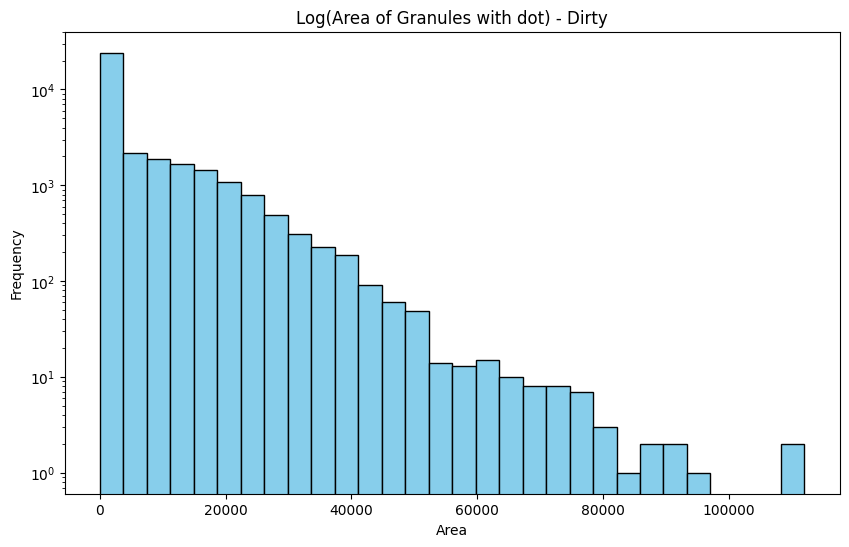

In [70]:
import matplotlib.pyplot as plt

# Plot a histogram of the area distribution
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=30, color='skyblue', edgecolor='black', log=True)
plt.title("Log(Area of Granules with dot) - Dirty")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.savefig("histogram_dirty.png")
plt.show()

In [71]:
with engine.connect() as conn:
    query = f"SELECT ST_Area(shape) FROM granule_with_lane;"
    results = conn.execute(text(query))

In [72]:
areas = [a[0] for a in results.fetchall()]

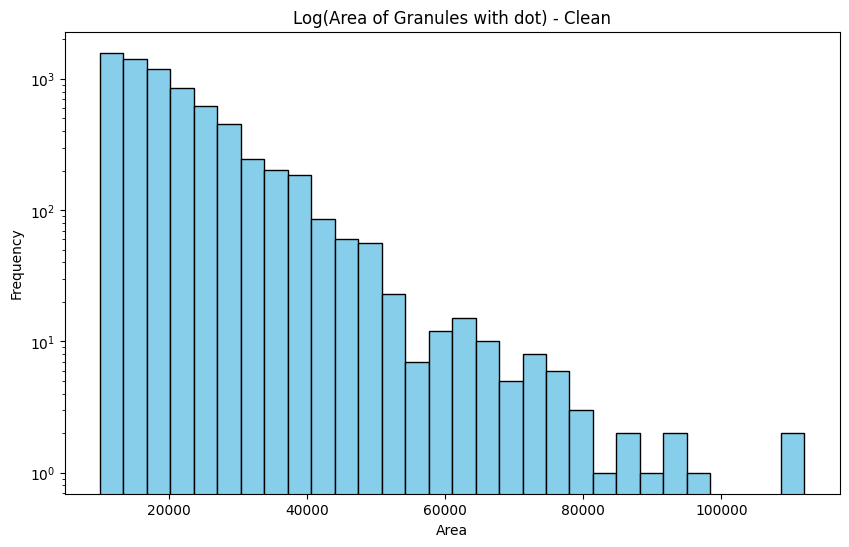

In [73]:
import matplotlib.pyplot as plt

# Plot a histogram of the area distribution
plt.figure(figsize=(10, 6))
plt.hist(areas, bins=30, color='skyblue', edgecolor='black', log=True)
plt.title("Log(Area of Granules with dot) - Clean")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.savefig("histogram_clean.png")
plt.show()